In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h2>LOADING DATA</h2>

In [2]:
data = pd.read_csv('./archive/insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<h2>UNDERSTANDING DATA</h2>

In [12]:
data.shape

(1338, 7)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [32]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [20]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [24]:
print(data.dtypes)
data.head()

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<h2>DATA PREPROCESSING</h2>

In [45]:
data['sex'] = data['sex'].astype('category')
data['region'] = data['region'].astype('category')
data['smoker'] = data['smoker'].astype('category')
data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [46]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [49]:
smoke_data = data.groupby("smoker")['charges'].mean().round(2)
print(smoke_data)
smoke_data = data.groupby("smoker")['age'].mean().round(2)
print(smoke_data)
smoke_data = data.groupby("smoker")['bmi'].mean().round(2)
print(smoke_data)
smoke_data = data.groupby("smoker")['children'].mean().round(2)
print(smoke_data)

smoker
no      8434.27
yes    32050.23
Name: charges, dtype: float64
smoker
no     39.39
yes    38.51
Name: age, dtype: float64
smoker
no     30.65
yes    30.71
Name: bmi, dtype: float64
smoker
no     1.09
yes    1.11
Name: children, dtype: float64


In [50]:
sns.set_style('whitegrid')

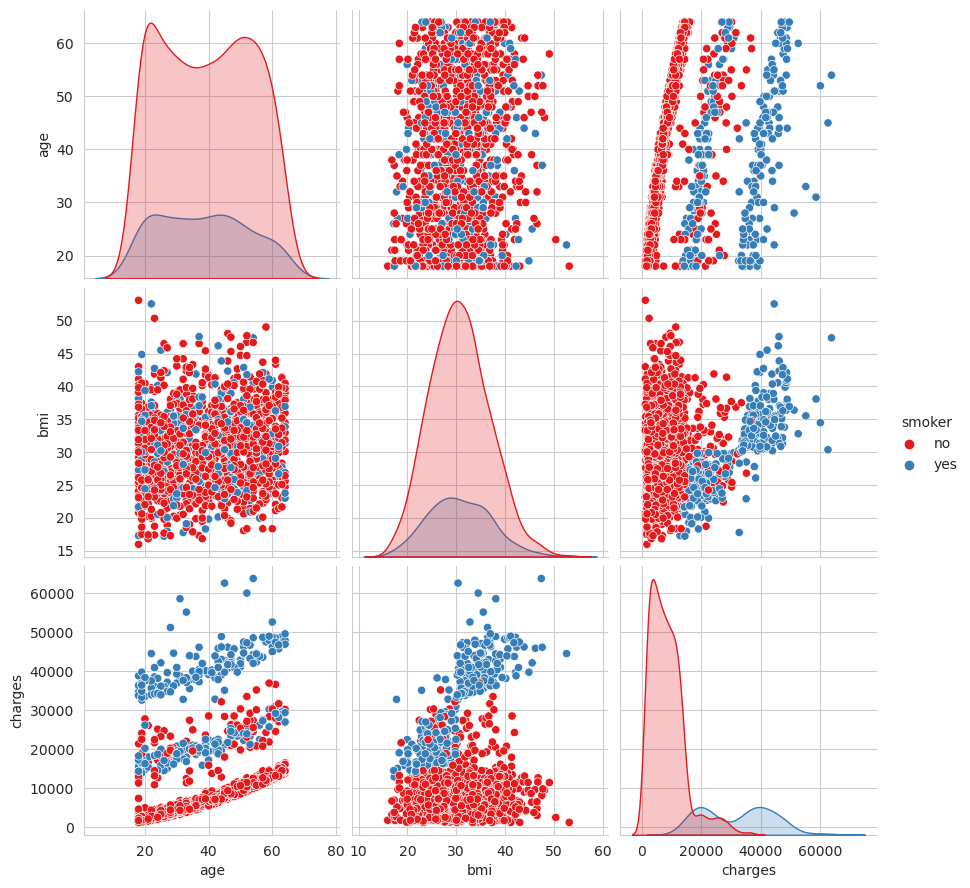

In [52]:
sns.pairplot(
    data[['age','bmi','charges','smoker']],
    hue = 'smoker',
    height=3,
    palette='Set1'
)

In [55]:
data = pd.get_dummies(data) #onehotencoding
data.shape

(1338, 12)

In [56]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [59]:
data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

<h2>BUILDING MODEL</h2>

In [65]:
y = data['charges']
y.head().round(2)

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: charges, dtype: float64

In [68]:
X = data.drop('charges',axis=1)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    train_size=0.80,
    random_state=1
)

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
model = LinearRegression()

In [74]:
model.fit(X_train,y_train)

LinearRegression()

<h2>MODEL EVALUATION</h2>

In [75]:
model.score(X_test,y_test).round(2)

0.76

In [76]:
model.score(X_train,y_train).round(2)

0.75

If the performance of the model on the training data was high, it would mean that there is an <b>overfitting</b> problem. To overcome the overfitting problem, we can use <b>regularization</b>. Ridge or lasso models can be used for this.

In [87]:
y_pred = model.predict(X_test)
print(y_test[0:5])
y_pred[0:5]

559      1646.4297
1087    11353.2276
1020     8798.5930
460     10381.4787
802      2103.0800
Name: charges, dtype: float64


array([ 4383.68089988, 12885.03892192, 12589.21653212, 13286.22919217,
         544.72832757])

In [94]:
from sklearn.metrics import mean_squared_error,accuracy_score
import math

In [88]:
math.sqrt(mean_squared_error(y_test, y_pred))

5956.454717976427

<h2>MODEL PREDICTION</h2>

In [90]:
data_row_1 = X_train[:1]
data_row_1

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
216,53,26.6,0,True,False,True,False,False,True,False,False


In [91]:
model.predict(data_row_1)

array([10508.41885042])

In [92]:
y_train[:1]

216    10355.641
Name: charges, dtype: float64